## Nhập thư viện

In [48]:
import numpy as np 
import pandas as pd 
import seaborn as sns                  
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings   
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Đường dẫn

In [49]:
path ='/content/drive/MyDrive/Colab Notebooks/Dataset_OLAP/'
os.chdir(path)

## Đọc dữ liệu

In [50]:
data = pd.read_csv("./SuperStore_dataset_resutl.csv",index_col =0)
data.head(5)

,Row_ID,Order_ID,Order Date,Ship Date,Ship Mode,Customer_ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product_ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Xử lý dữ liệu

In [51]:
# Xóa các cột không cần thiết
data = data.drop(['Row_ID','Customer Name', 'Country', 'Product Name','Postal Code','Product_ID'], axis=1)
    
# Xóa các cột liên quan đến khách hàng
data = data.drop(['Order_ID', 'Customer_ID'], axis=1)

In [52]:
#Kiểm tra số cột, số dòng, kiểu dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    9994 non-null   object 
 1   Ship Date     9994 non-null   object 
 2   Ship Mode     9994 non-null   object 
 3   Segment       9994 non-null   object 
 4   City          9994 non-null   object 
 5   State         9994 non-null   object 
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


In [53]:
# Kiểm tra số dòng và số cột
data.shape

(9994, 13)

In [54]:
# Kiểm tra các giá trị còn thiếu
data.isnull().sum()

Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [55]:
# Kiểm tra dữ liệu trùng lặp
data.duplicated().sum()
# Xóa dữ liệu trùng lặp (nếu có dữ liệu trùng lặp)
data.drop_duplicates(inplace = True)

In [56]:
# Thống kê
data.describe()

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971
std,623.276074,2.225149,0.206457,234.271476
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.731000
50%,54.480000,3.000000,0.200000,8.671000
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [57]:
# Mối tương quan giữa các biến
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200808,-0.028197,0.479067
Quantity,0.200808,1.000000,0.008680,0.066241
Discount,-0.028197,0.008680,1.000000,-0.219481
Profit,0.479067,0.066241,-0.219481,1.000000


## Biến phân loại, biến số, biến mục tiêu

### Tìm biến phân loại và biến số

In [58]:
# Tìm biến phân loại 
categorical = [var for var in data.columns if data[var].dtype=='O']
print('Có {} biến phân loại'.format(len(categorical)))
print('Đó là những biến :\n', categorical)
print('-----------------------------------------------------------------------------------------')
# Tìm biến số
numeric = [var for var in data.columns if data[var].dtype != 'O']
print('Có {} biến số'.format(len(numeric)))
print('Đó là những biến :\n', numeric)

Có 9 biến phân loại
Đó là những biến :
 ['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category']
-----------------------------------------------------------------------------------------
Có 4 biến số
Đó là những biến :
 ['Sales', 'Quantity', 'Discount', 'Profit']


### Biểu diễn biến phân loại : Ship Mode, Segment, Region, Category, Sub-Category

Text(0.5, 1.0, 'Category')

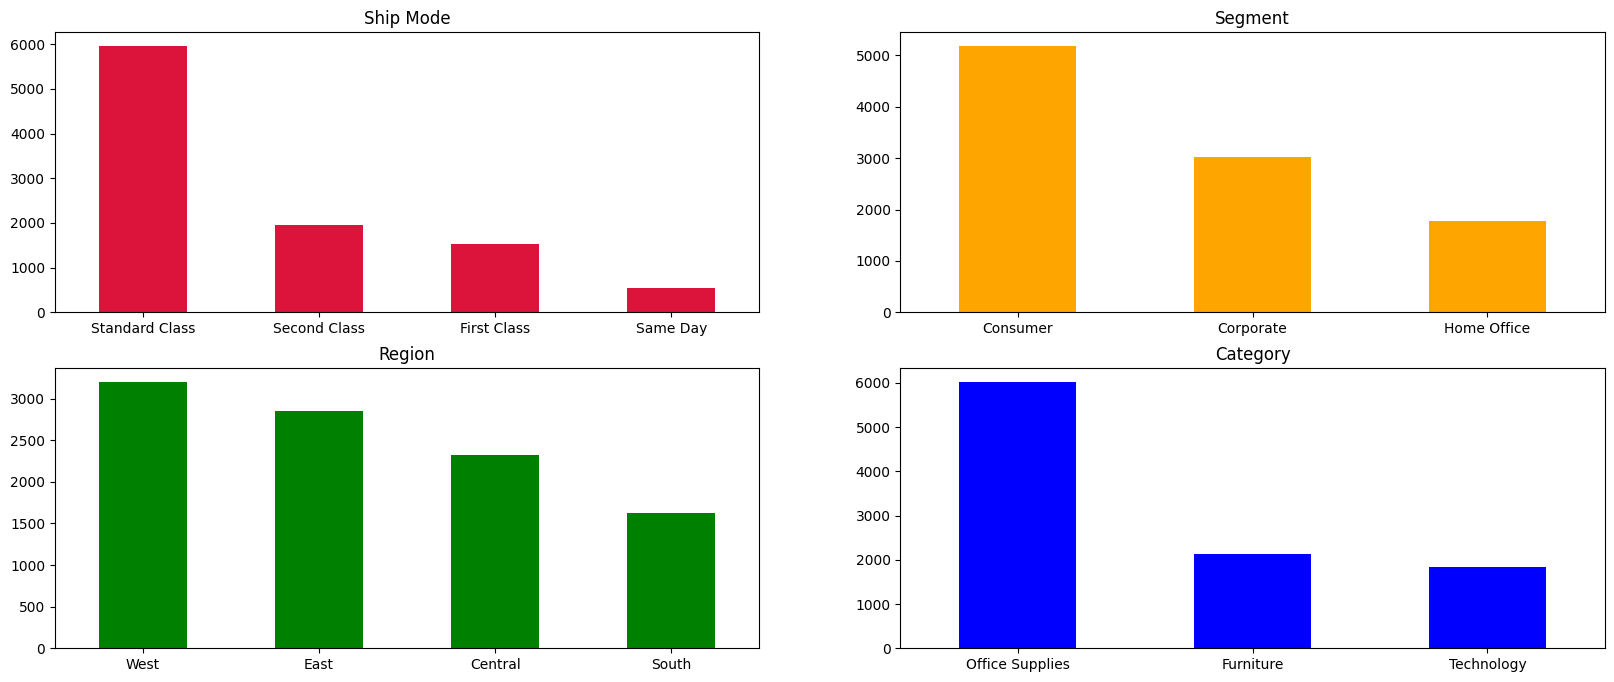

In [59]:
plt.figure(figsize=(20,8))

# Ship Mode
plt.subplot(221)
data['Ship Mode'].value_counts().plot(kind='bar',color='crimson',rot=0)
plt.title('Ship Mode')
# Segment
plt.subplot(222)
data['Segment'].value_counts().plot(kind='bar',color='orange',rot=0)
plt.title('Segment')
# Region
plt.subplot(223)
data['Region'].value_counts().plot(kind='bar',color='green',rot=0)
plt.title('Region')
# Category
plt.subplot(224)
data['Category'].value_counts().plot(kind='bar',color='blue',rot=0)
plt.title('Category')

Text(0.5, 1.0, 'Sub-Category')

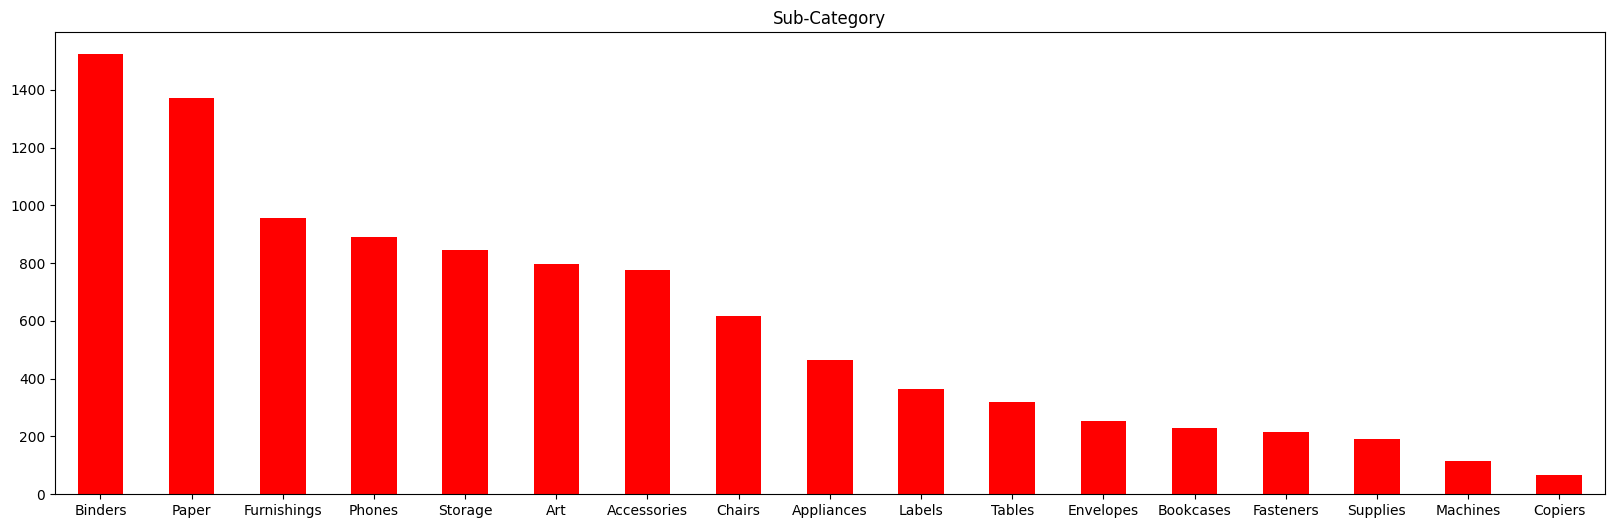

In [60]:
# Sub-Category
plt.figure(figsize=(20,6))
data['Sub-Category'].value_counts().plot(kind='bar',color='red',rot=0)
plt.title('Sub-Category')

### Biểu diễn các biến số

Text(0.5, 1.0, 'Discount')

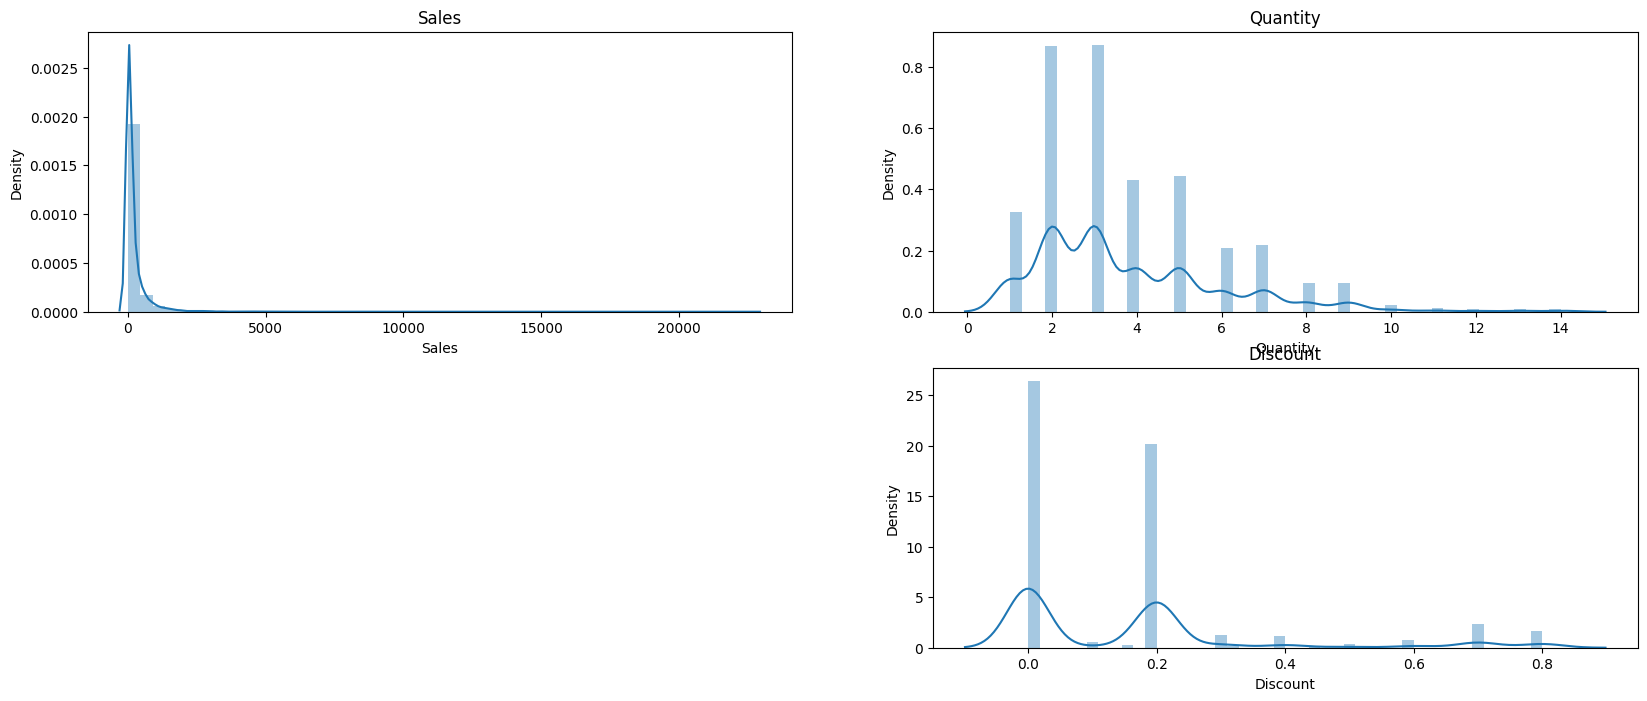

In [61]:
plt.figure(figsize=(20,8))
# Sales
plt.subplot(221)
sns.distplot(data['Sales'])
plt.title('Sales')
# Quantity
plt.subplot(222)
sns.distplot(data['Quantity'])
plt.title('Quantity')
# Discount
plt.subplot(224)
sns.distplot(data['Discount'])
plt.title('Discount')


### Biểu diễn biến mục tiêu của mô hình là : Profit

<Axes: >

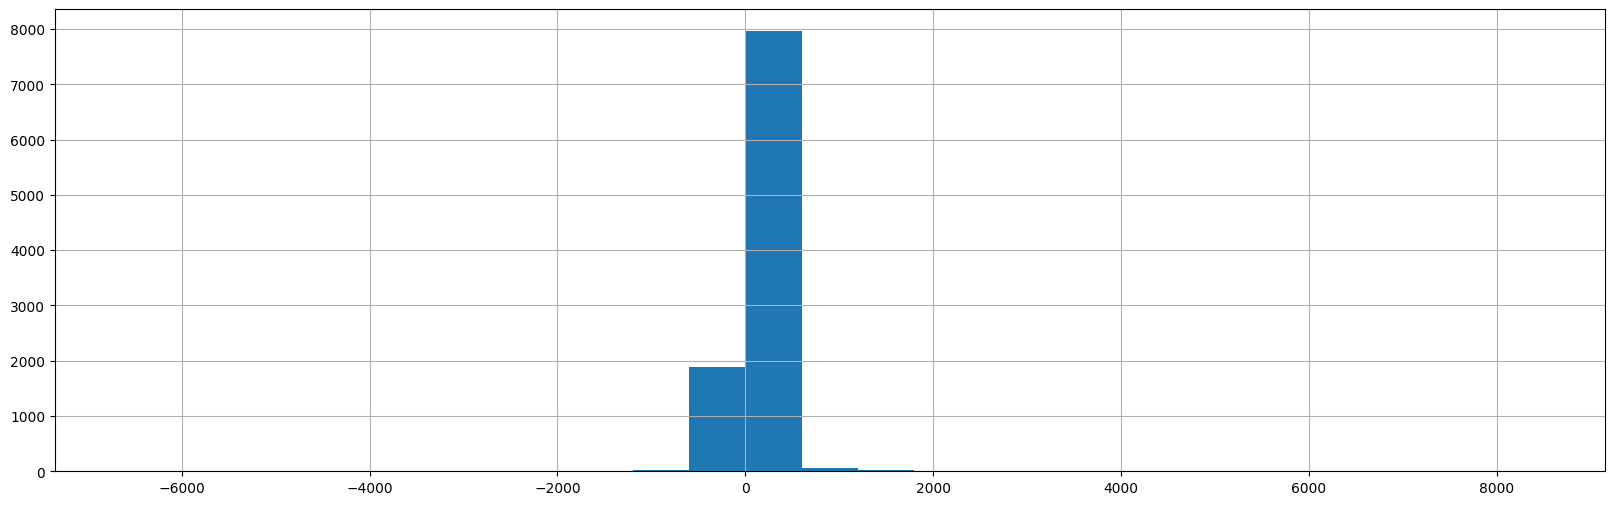

In [62]:
# Profit 
plt.figure(figsize = (20, 6))
data['Profit'].hist(bins = 25)

In [63]:
# top 5 lợi nhuận cao nhất
data['Profit'].sort_values(ascending = False)[:5]

6826    8399.9760
8153    6719.9808
4190    5039.9856
9039    4946.3700
4098    4630.4755
Name: Profit, dtype: float64

In [64]:
# top 5 lợi nhuận thấp nhất 
data['Profit'].sort_values()[:5]

7772   -6599.9780
683    -3839.9904
9774   -3701.8928
3011   -3399.9800
4991   -2929.4845
Name: Profit, dtype: float64

### Biểu diễn mối quan hệ của biến mục tiêu và biến phân loại 

Text(0.5, 1.0, 'Category vs Profit')

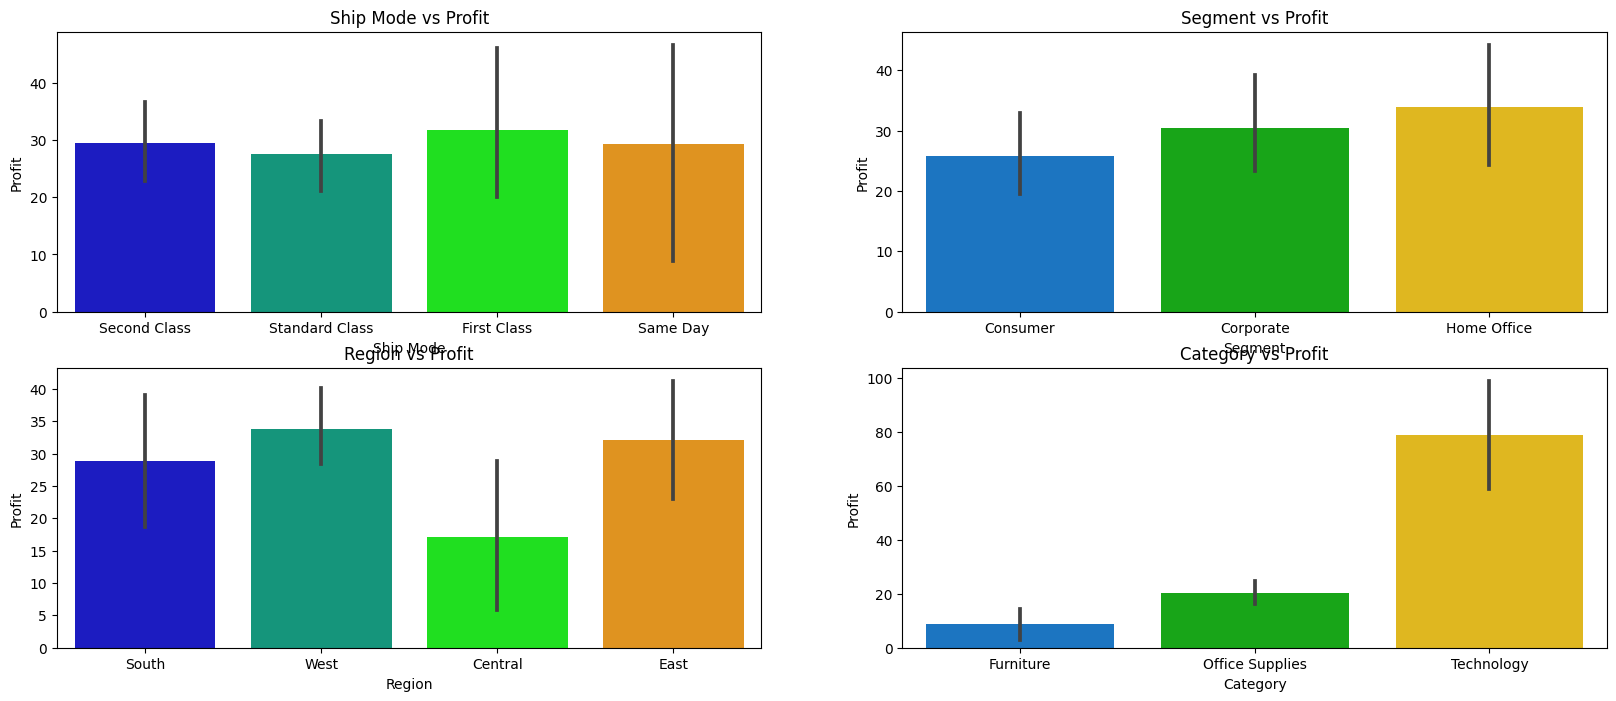

In [65]:
plt.figure(figsize = (20, 8))
# Ship Mode vs Profit
plt.subplot(221)
sns.barplot(x = data['Ship Mode'], y = data['Profit'], palette = "nipy_spectral")
plt.title('Ship Mode vs Profit')
# Segment vs Profit
plt.subplot(222)
sns.barplot(x = data['Segment'], y = data['Profit'], palette = "nipy_spectral")
plt.title('Segment vs Profit')
# Region vs Profit
plt.subplot(223)
sns.barplot(x = data['Region'], y = data['Profit'], palette = "nipy_spectral")
plt.title('Region vs Profit')
# Category vs Profit
plt.subplot(224)
sns.barplot(x = data['Category'], y = data['Profit'], palette = "nipy_spectral")
plt.title('Category vs Profit')

Text(0.5, 1.0, 'Sub-Category')

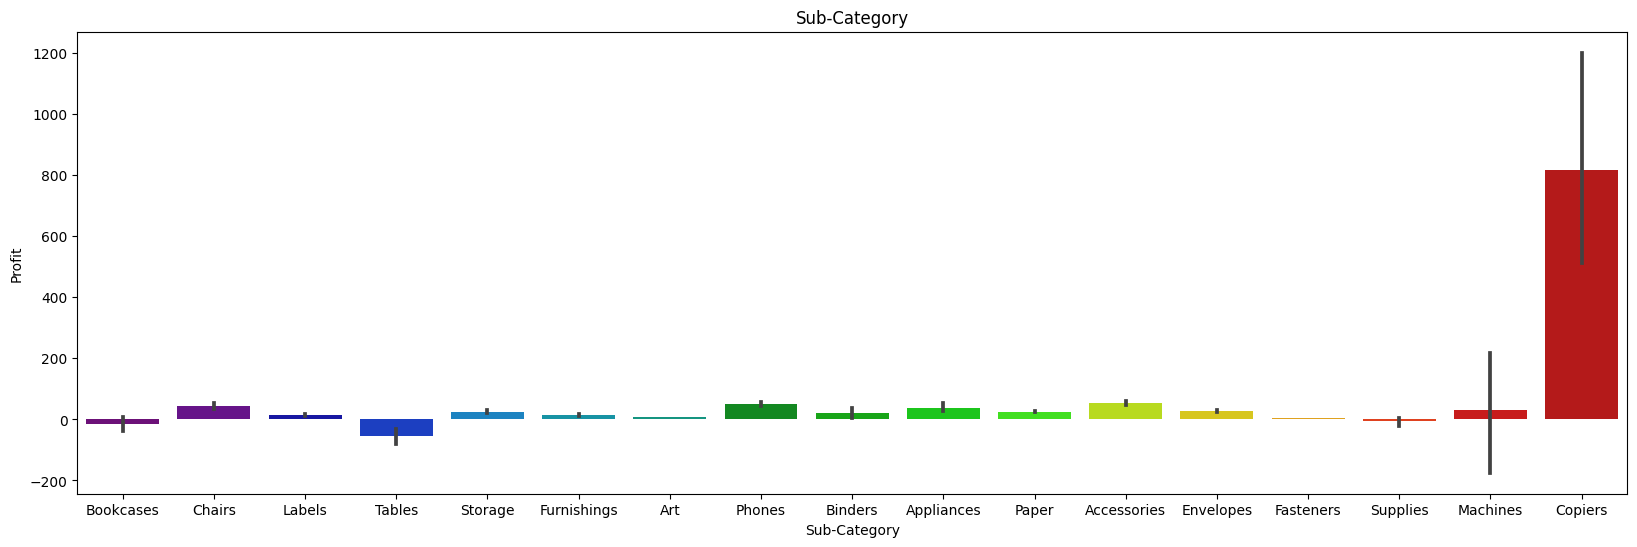

In [66]:
# Sub-Category vs Profit
plt.figure(figsize=(20,6))
sns.barplot(x = data['Sub-Category'], y = data['Profit'], palette = "nipy_spectral")
plt.title('Sub-Category')

### Biểu diễn mối quan hệ của biến mục tiêu và biến số

Text(0, 0.5, 'Profit')

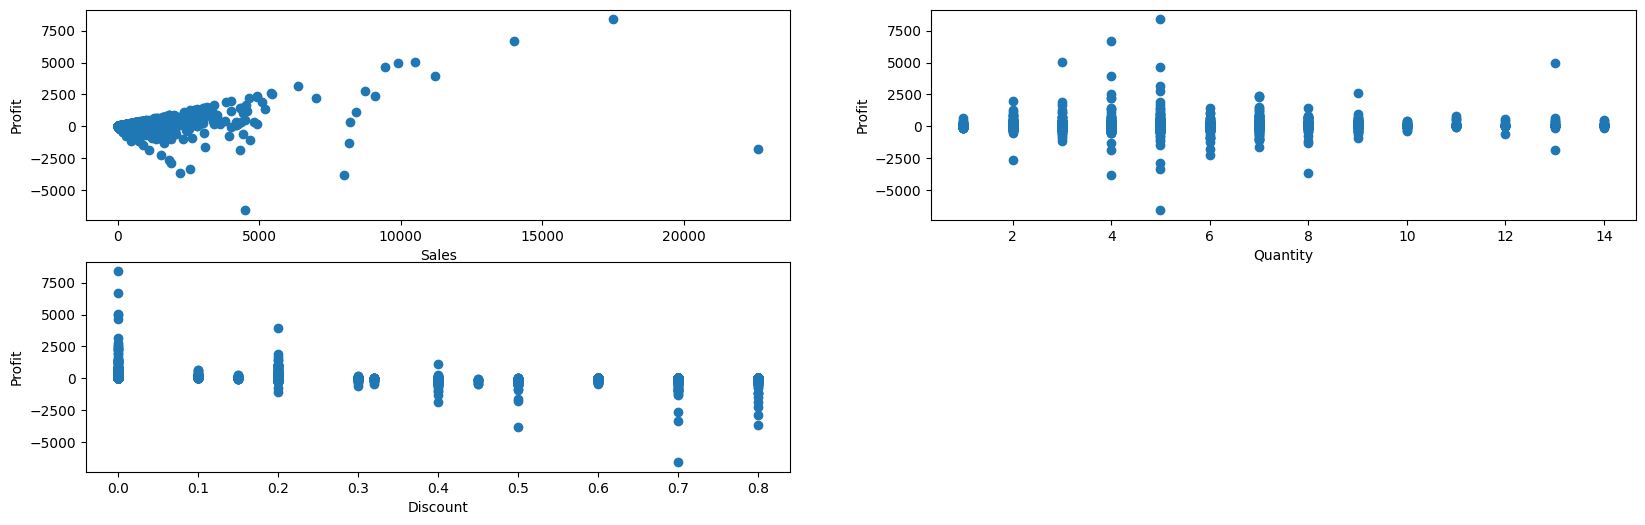

In [67]:
plt.figure(figsize = (20, 6))
# Sales vs Profit
plt.subplot(221)
plt.ticklabel_format(style = 'plain')
plt.scatter(data['Sales'], data['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
# Quantity vs Profit
plt.subplot(222)
plt.ticklabel_format(style = 'plain')
plt.scatter(data['Quantity'], data['Profit'])
plt.xlabel('Quantity')
plt.ylabel('Profit')
# Discount vs Profit
plt.subplot(223)
plt.ticklabel_format(style = 'plain')
plt.scatter(data['Discount'], data['Profit'])
plt.xlabel('Discount')
plt.ylabel('Profit')

## Phân loại biến lợi nhuận 

In [68]:
p = data['Profit'].values.astype('O')

for j in range(len(p)):
    if p[j] > 0:
        p[j] = 'Gain' #Lợi nhuận lớn hơn 0 : Gain tương đương với 0
    elif p[j] < 0:
        p[j] = 'Loss' #Lợi nhuận nhỏ hơn 0 : Loss tương đương với 1
    else:
        p[j] = 'Nil'  #Lợi nhuận bằng 0 : Nil tương đương với 2

In [69]:
data['Gain_Loss']=p

In [70]:
data= data.drop(['Profit'],axis=1)

In [71]:
data.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Gain_Loss
0,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,Gain
1,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,Gain
2,2016-06-12,2016-06-16,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,Gain
3,2015-10-11,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,Loss
4,2015-10-11,2015-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,Gain


## Mã hóa biến phân loại 

In [72]:
x = data 

# Mã hóa bằng LabelEncoder
x1 = x.select_dtypes('O')

for col in x1.columns:
    lb = LabelEncoder()
    x[col] = lb.fit_transform(x1[col].values)
# Sau khi mã hóa 
x.head()


,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Gain_Loss
0,864,929,2,0,194,15,2,0,4,261.9600,2,0.00,0
1,864,929,2,0,194,15,2,0,5,731.9400,3,0.00,0
2,732,787,2,1,266,3,3,1,10,14.6200,2,0.00,0
3,519,568,3,0,153,8,2,0,16,957.5775,5,0.45,1
4,519,568,3,0,153,8,2,1,14,22.3680,2,0.20,0


## Tách dữ liệu thành tập train và test riêng biệt

In [73]:
# Khai báo vector đặc trưng và biến mục tiêu 
x = data.drop(['Gain_Loss'],axis=1)
y= data['Gain_Loss']

# Tách dữ liệu thành tập train và test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) #test_size = 30% => train = 70%
# Kiểm tra shape của X_train và X_test
x_train.shape, x_test.shape


((6995, 12), (2998, 12))

In [74]:
# Kiểm tra dữ liệu có bị mất mác hay không 
x_train.isnull().sum()

Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
dtype: int64

In [75]:
# Kiểm tra dữ liệu có bị mất mác hay không 
x_test.isnull().sum()

Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
dtype: int64

## Xây dựng mô hình

### Random Forest

In [76]:
# Khởi tạo (số cây 150 cây, độ sâu lớn nhất = 4, random_state = 0)
cm_rfc = RandomForestClassifier(n_estimators=150,max_depth=4,random_state=0)
# Fit mô hình
cm_rfc.fit(x_train, y_train)
# Kết quả
print (cm_rfc.score(x_train,y_train), cm_rfc.score(x_test,y_test))
# Dự báo kết quả
y_pred = cm_rfc.predict(x_test)


0.9380986418870622 0.9379586390927285


In [77]:
# Kết quả
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('CL Report:',metrics.classification_report(y_test, y_pred))

Accuracy:  0.9379586390927285
CL Report:               precision    recall  f1-score   support

           0       0.93      1.00      0.96      2415
           1       0.97      0.72      0.83       561
           2       0.00      0.00      0.00        22

    accuracy                           0.94      2998
   macro avg       0.63      0.57      0.60      2998
weighted avg       0.93      0.94      0.93      2998



In [78]:
cm_rfc.estimators_

[DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt',
                        random_state=1478610112),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt',
                        random_state=1537364731),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt',
                        random_state=1491434855),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt',
                        random_state=1819583497),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=530702035),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state

In [79]:
# Điểm số của các tính năng quan trọng
feature_scores = pd.Series(cm_rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores

Discount        0.710713
State           0.106830
Sub-Category    0.064958
Region          0.035371
Category        0.030955
Sales           0.024767
City            0.019740
Quantity        0.002337
Order Date      0.002061
Ship Date       0.001615
Ship Mode       0.000427
Segment         0.000227
dtype: float64

#### Ma trận nhầm lẫn

In [80]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
cm

array([[2406,    9,    0],
       [ 155,  406,    0],
       [  17,    5,    0]])

In [81]:
cm_df = pd.DataFrame(cm,
                     index = ['Gain','Loss','Nil'], 
                     columns =  ['Gain','Loss','Nil'])

<Axes: >

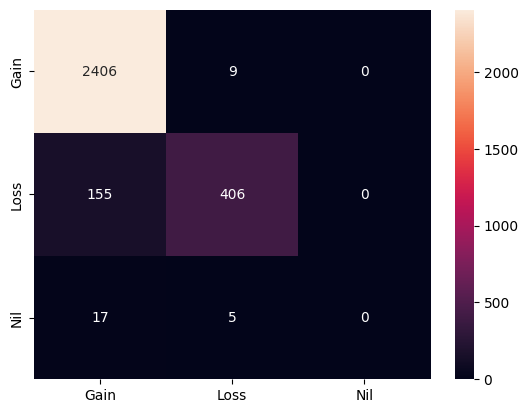

In [82]:
sns.heatmap(cm_df, annot=True, fmt='d')

#### Cây nhị phân

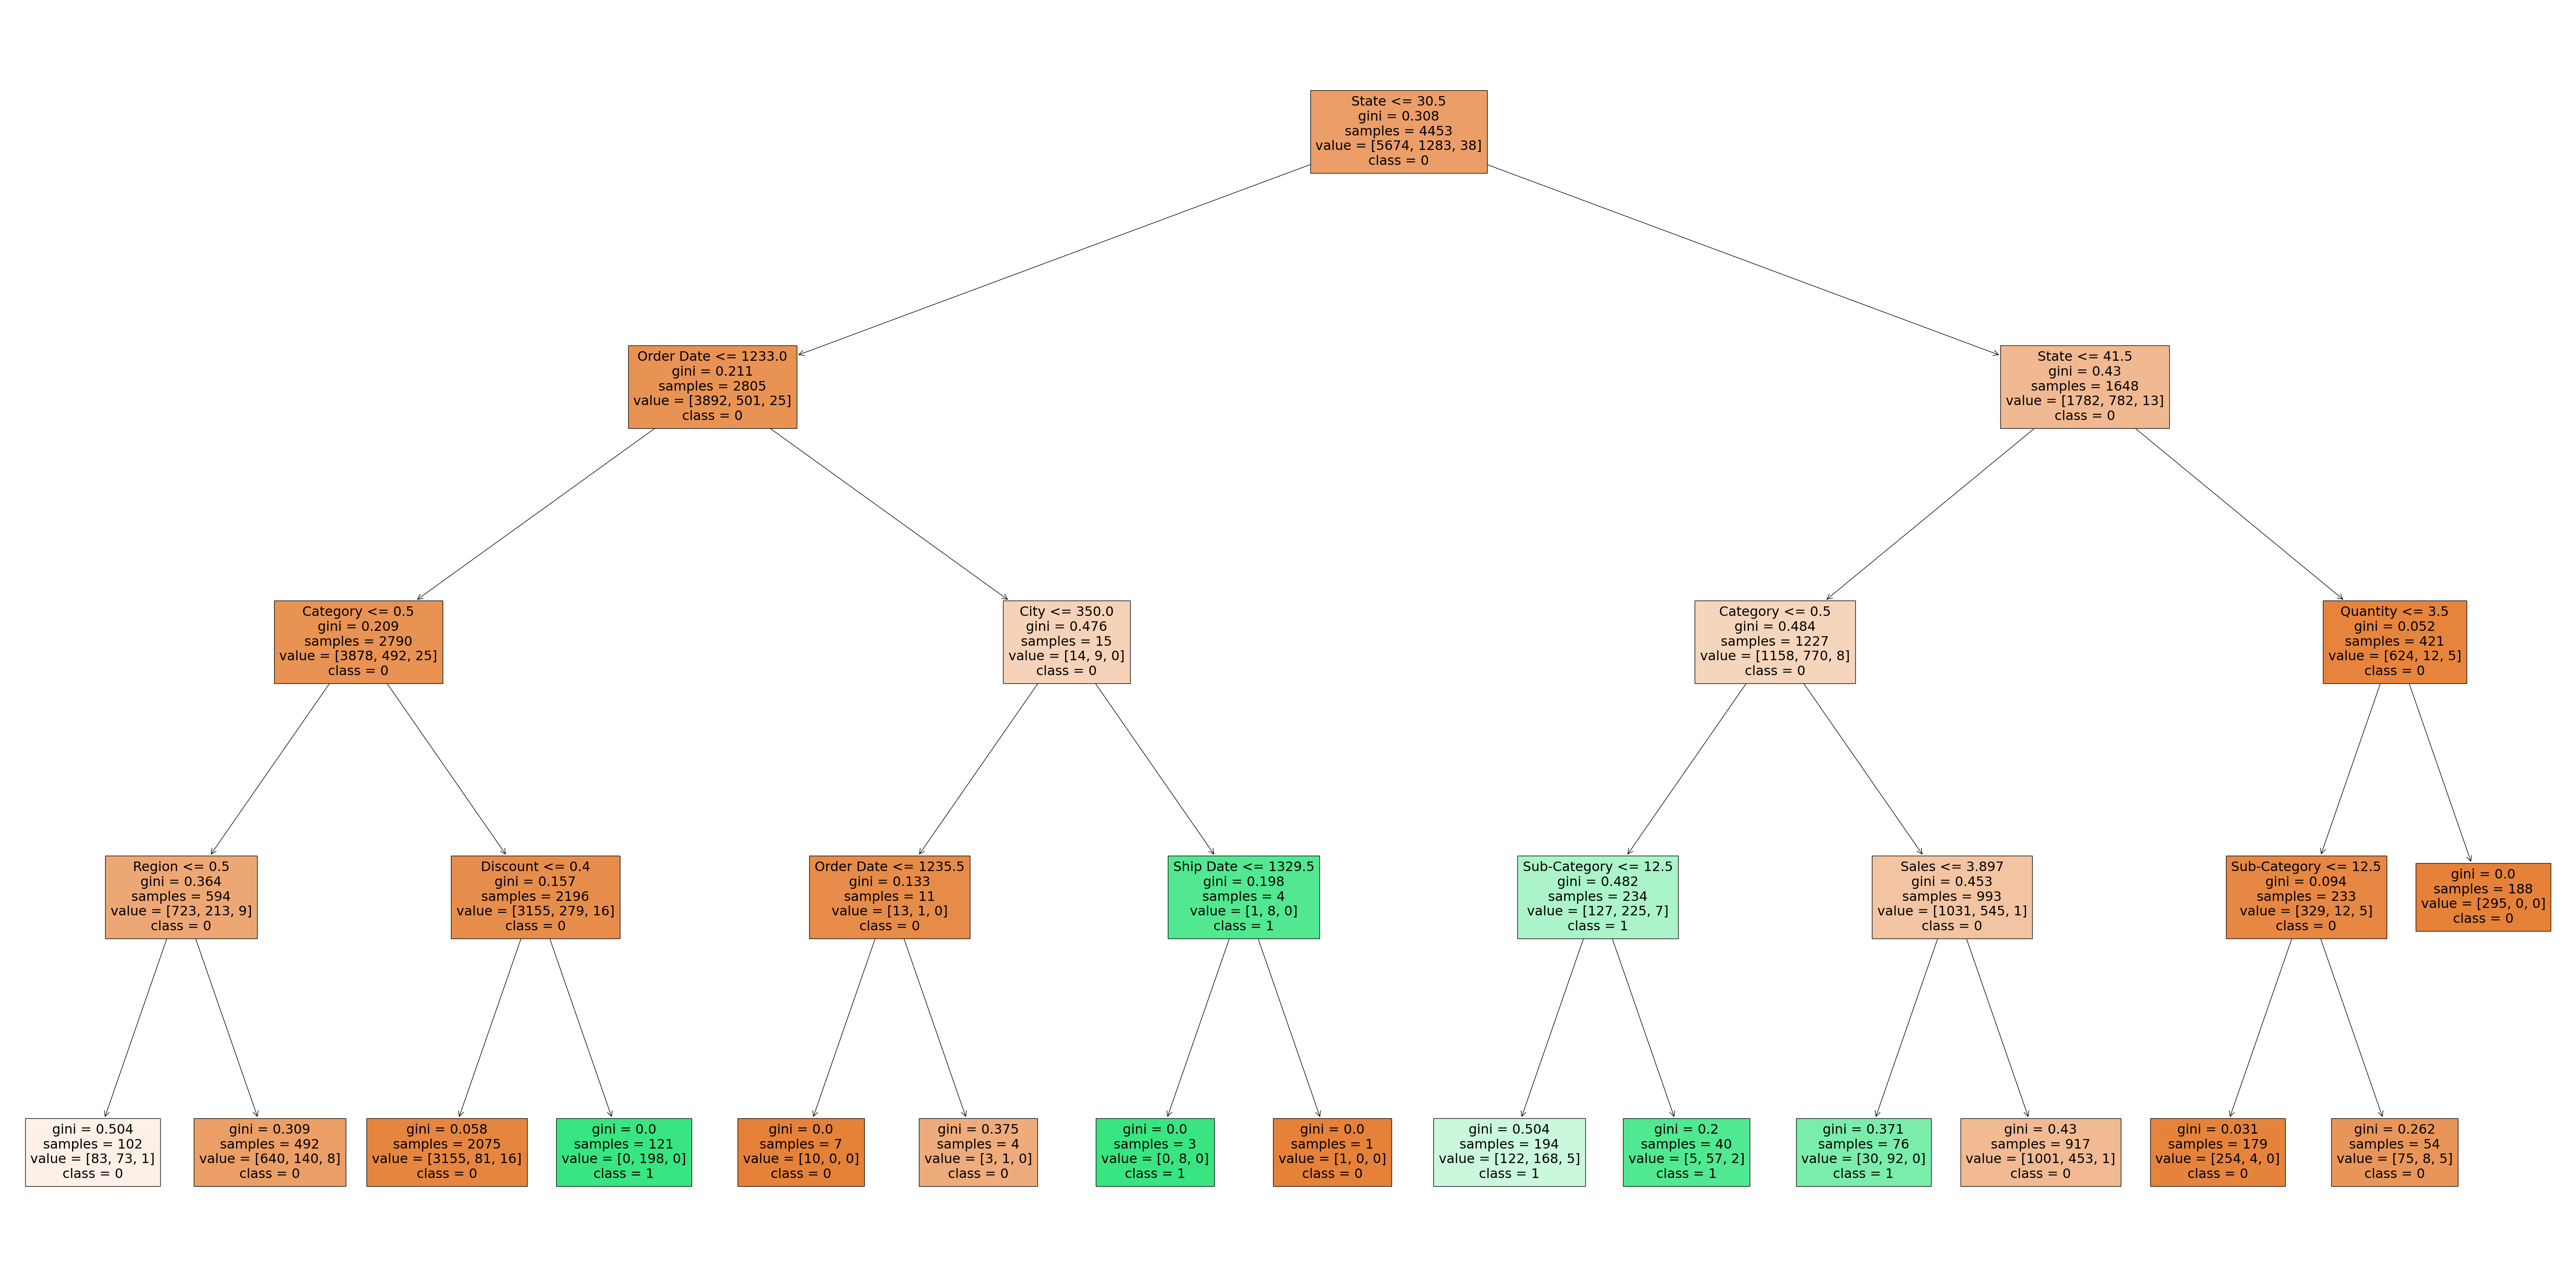

In [83]:
from sklearn import tree
classe = ['0','1','2']
plt.figure(figsize=(80,40))
tree.plot_tree(cm_rfc.estimators_[1], feature_names=x.columns ,class_names=classe, filled=True);


### Decision Tree

In [84]:
# Khởi tạo mô hình 
cm_dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=17)
# Fit mô hình
cm_dtc.fit(x_train, y_train)
# Kết quả 
print (cm_dtc.score(x_train,y_train), cm_dtc.score(x_test,y_test))
# Kết quả dự báo 
y_pred = cm_dtc.predict(x_test)

0.9396711937097927 0.933955970647098


In [85]:
# Kết quả
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('CL Report:',metrics.classification_report(y_test, y_pred))

Accuracy:  0.933955970647098
CL Report:               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2415
           1       0.84      0.83      0.84       561
           2       0.00      0.00      0.00        22

    accuracy                           0.93      2998
   macro avg       0.60      0.60      0.60      2998
weighted avg       0.93      0.93      0.93      2998



#### Ma trận nhầm lẫn 

In [86]:
cm_dt = confusion_matrix(y_test,y_pred) 
cm_dt

array([[2335,   80,    0],
       [  96,  465,    0],
       [  16,    6,    0]])

In [87]:
cm_df = pd.DataFrame(cm_dt,
                     index = ['Gain','Loss','Nil'], 
                     columns =  ['Gain','Loss','Nil'])

<Axes: >

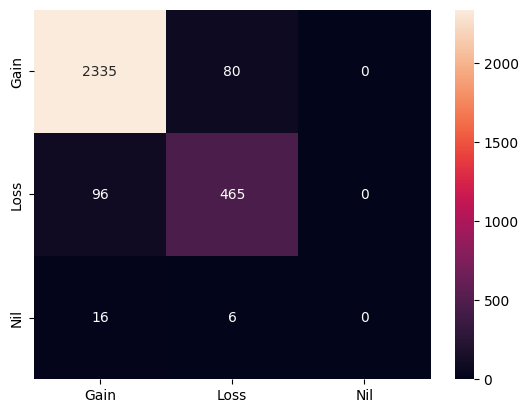

In [88]:
sns.heatmap(cm_df, annot=True, fmt='d')

#### Cây nhị phân

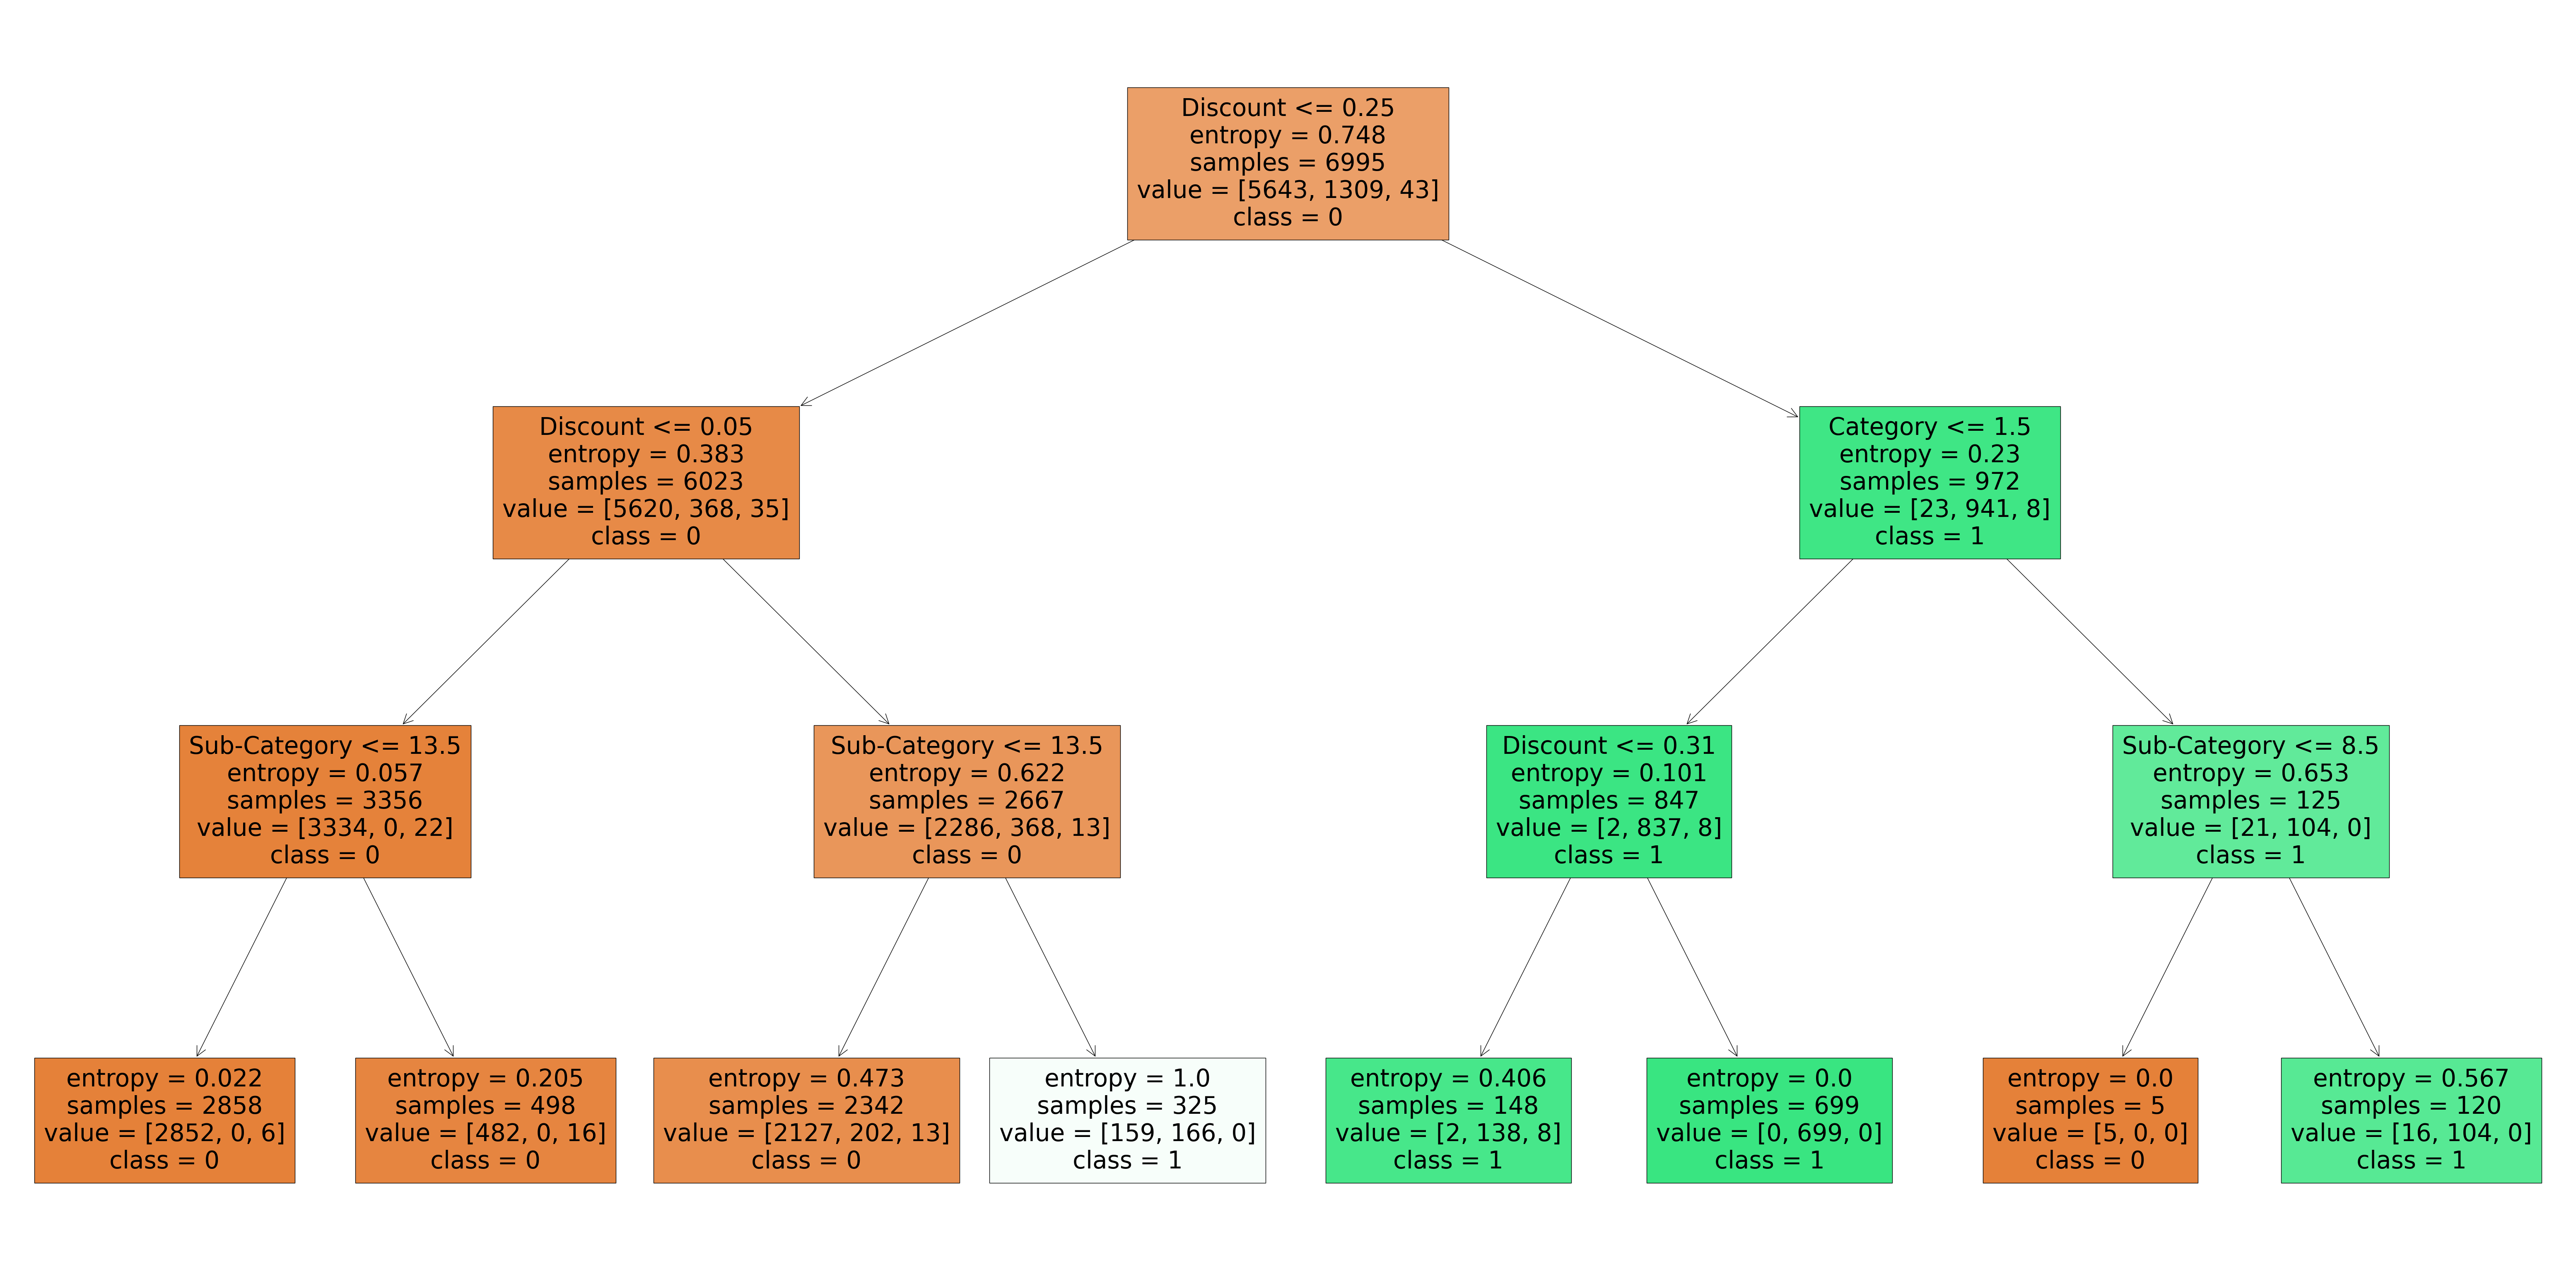

In [89]:
classe = ['0','1','2']
plt.figure(figsize=(80,40))
tree.plot_tree(cm_dtc, feature_names=x.columns ,class_names=classe, filled=True);